## **Simple Linear Regression**

**Jenis Data tiap variabel**

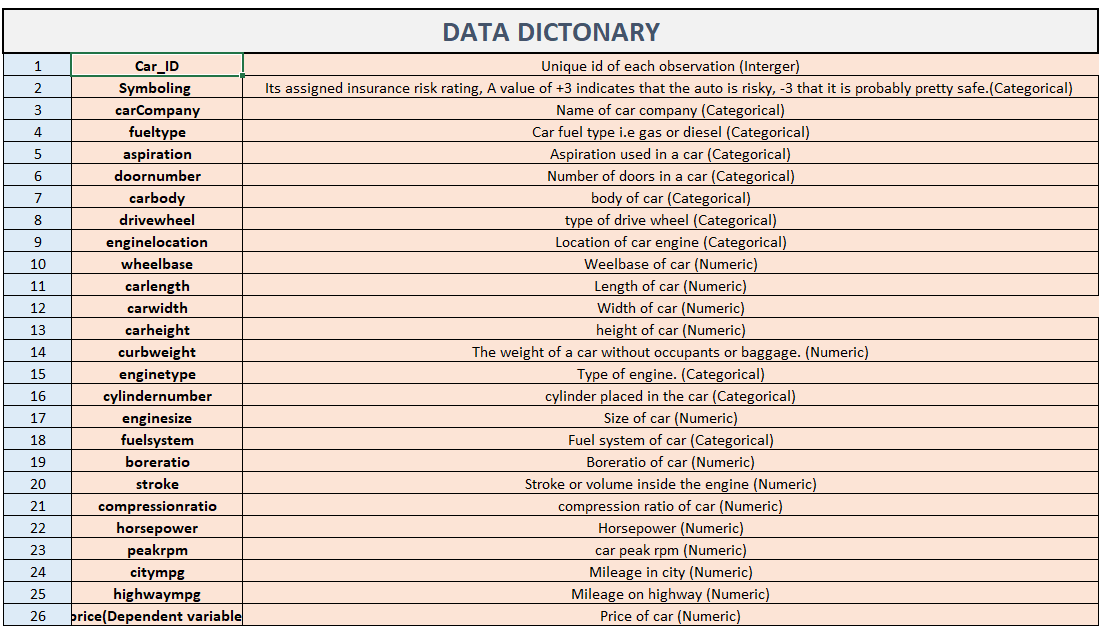

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset = '/content/CarPrice_Assignment.csv'
df = pd.read_csv('/content/CarPrice_Assignment.csv')
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [ ]:
#Check completeness of data
check = df.isnull().values.any()
if check == False:
  print("Data Lengkap")
else:
  print("Terdapat Data yang tidak lengkap")

Data Lengkap


In [ ]:
#mengubah jenis data variabel symboling dari int64 menjadi object
df['symboling'] = df['symboling'].astype('object')

In [ ]:
#Cek jenis data tiap variabel dan kita sesuaikan dengan data dictionary yang disediakan oleh author
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

pada variabel symboling seharusnya termasuk data object (menurut dictionary) namun pada keterangan python terbaca sebagai jenis data integer (numeric). maka apabila dibuat regresi linier berganda perlu mengubahnya menjadi object (categoric). Namun kali ini saya tidak menggunakan variabel tersebut sehingga tidak perlu mengubah jenis data.

In [ ]:
## About the data

print("The size of the datasets : ", df.shape[0])
print("Total number of columns are : ",df.shape[1])
print("Columns ;")
print()
print(df.columns.values)

The size of the datasets :  205
Total number of columns are :  26
Columns ;

['car_ID' 'symboling' 'CarName' 'fueltype' 'aspiration' 'doornumber'
 'carbody' 'drivewheel' 'enginelocation' 'wheelbase' 'carlength'
 'carwidth' 'carheight' 'curbweight' 'enginetype' 'cylindernumber'
 'enginesize' 'fuelsystem' 'boreratio' 'stroke' 'compressionratio'
 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']


## **Exploratory Data Analysis**

Tahap ini merupakan tahap yang penting sebelum membuat model regresi. Pada tahap eksplorasi data ini, saya akan membuat beberapa visualisasi data untuk mengetahui hubungan antara variabel, khususnya variabel respons dan variabel prediktor.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


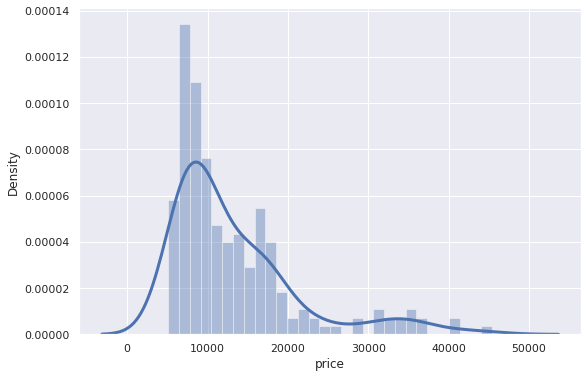

In [ ]:
#untuk mengetahui distribusi dari variabel respons
sns.set(rc={'figure.figsize':(9,6)}) 
sns.distplot(df['price'], bins=30, kde_kws={'linewidth': 3})  #variabel price merupakan variabel respon
plt.show()

<function matplotlib.pyplot.show>

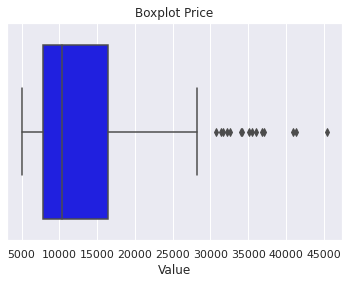

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], color='blue')
plt.xlabel('Value')
plt.title('Boxplot Price')
plt.show

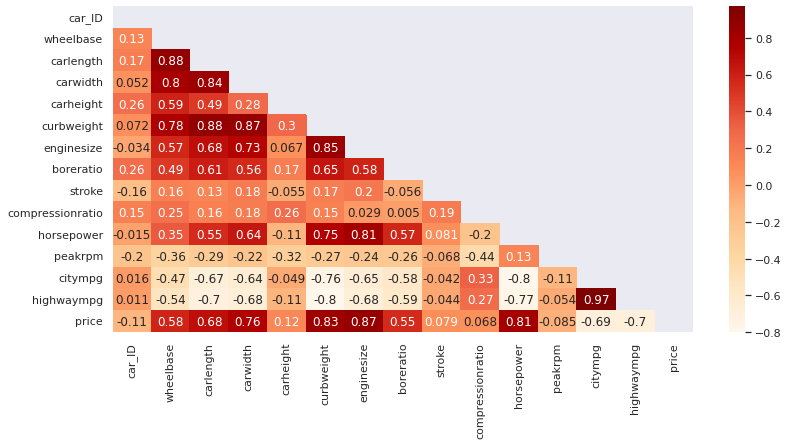

In [ ]:
#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah
 
# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(13,6)}) 
sns.heatmap(df.corr(method='pearson').round(3), annot=True, cmap='OrRd', mask=mask)

Nilai korelasi antara variabel ditunjukkan dalam kotak. price (price of car) dengan enginesize (size of car) memiliki korelasi positif yang kuat sebesar 0,87 dan memiliki korelasi negatif yang kuat dengan highwaympg (mileage on highway) sebesar -0,7.

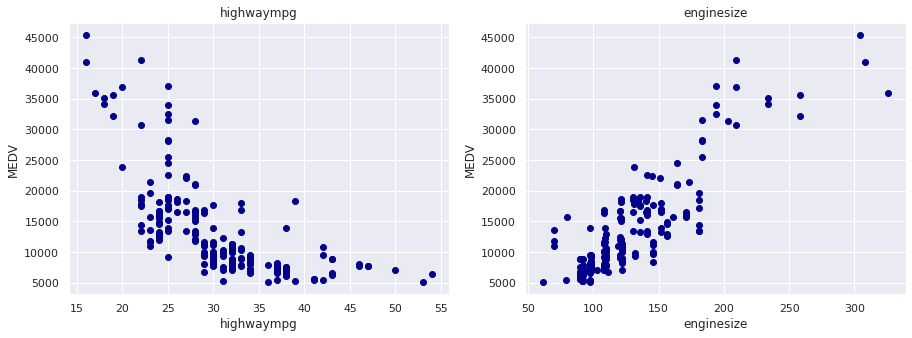

In [ ]:
#untuk membuat scatter plot antara variabel respons dan variabel prediktor
plt.figure(figsize=(15, 5))

predictors = ['highwaympg', 'enginesize']
response = df['price']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#jika ingin membuat plot semua variabel
#sns.pairplot(df)
#plt.show()

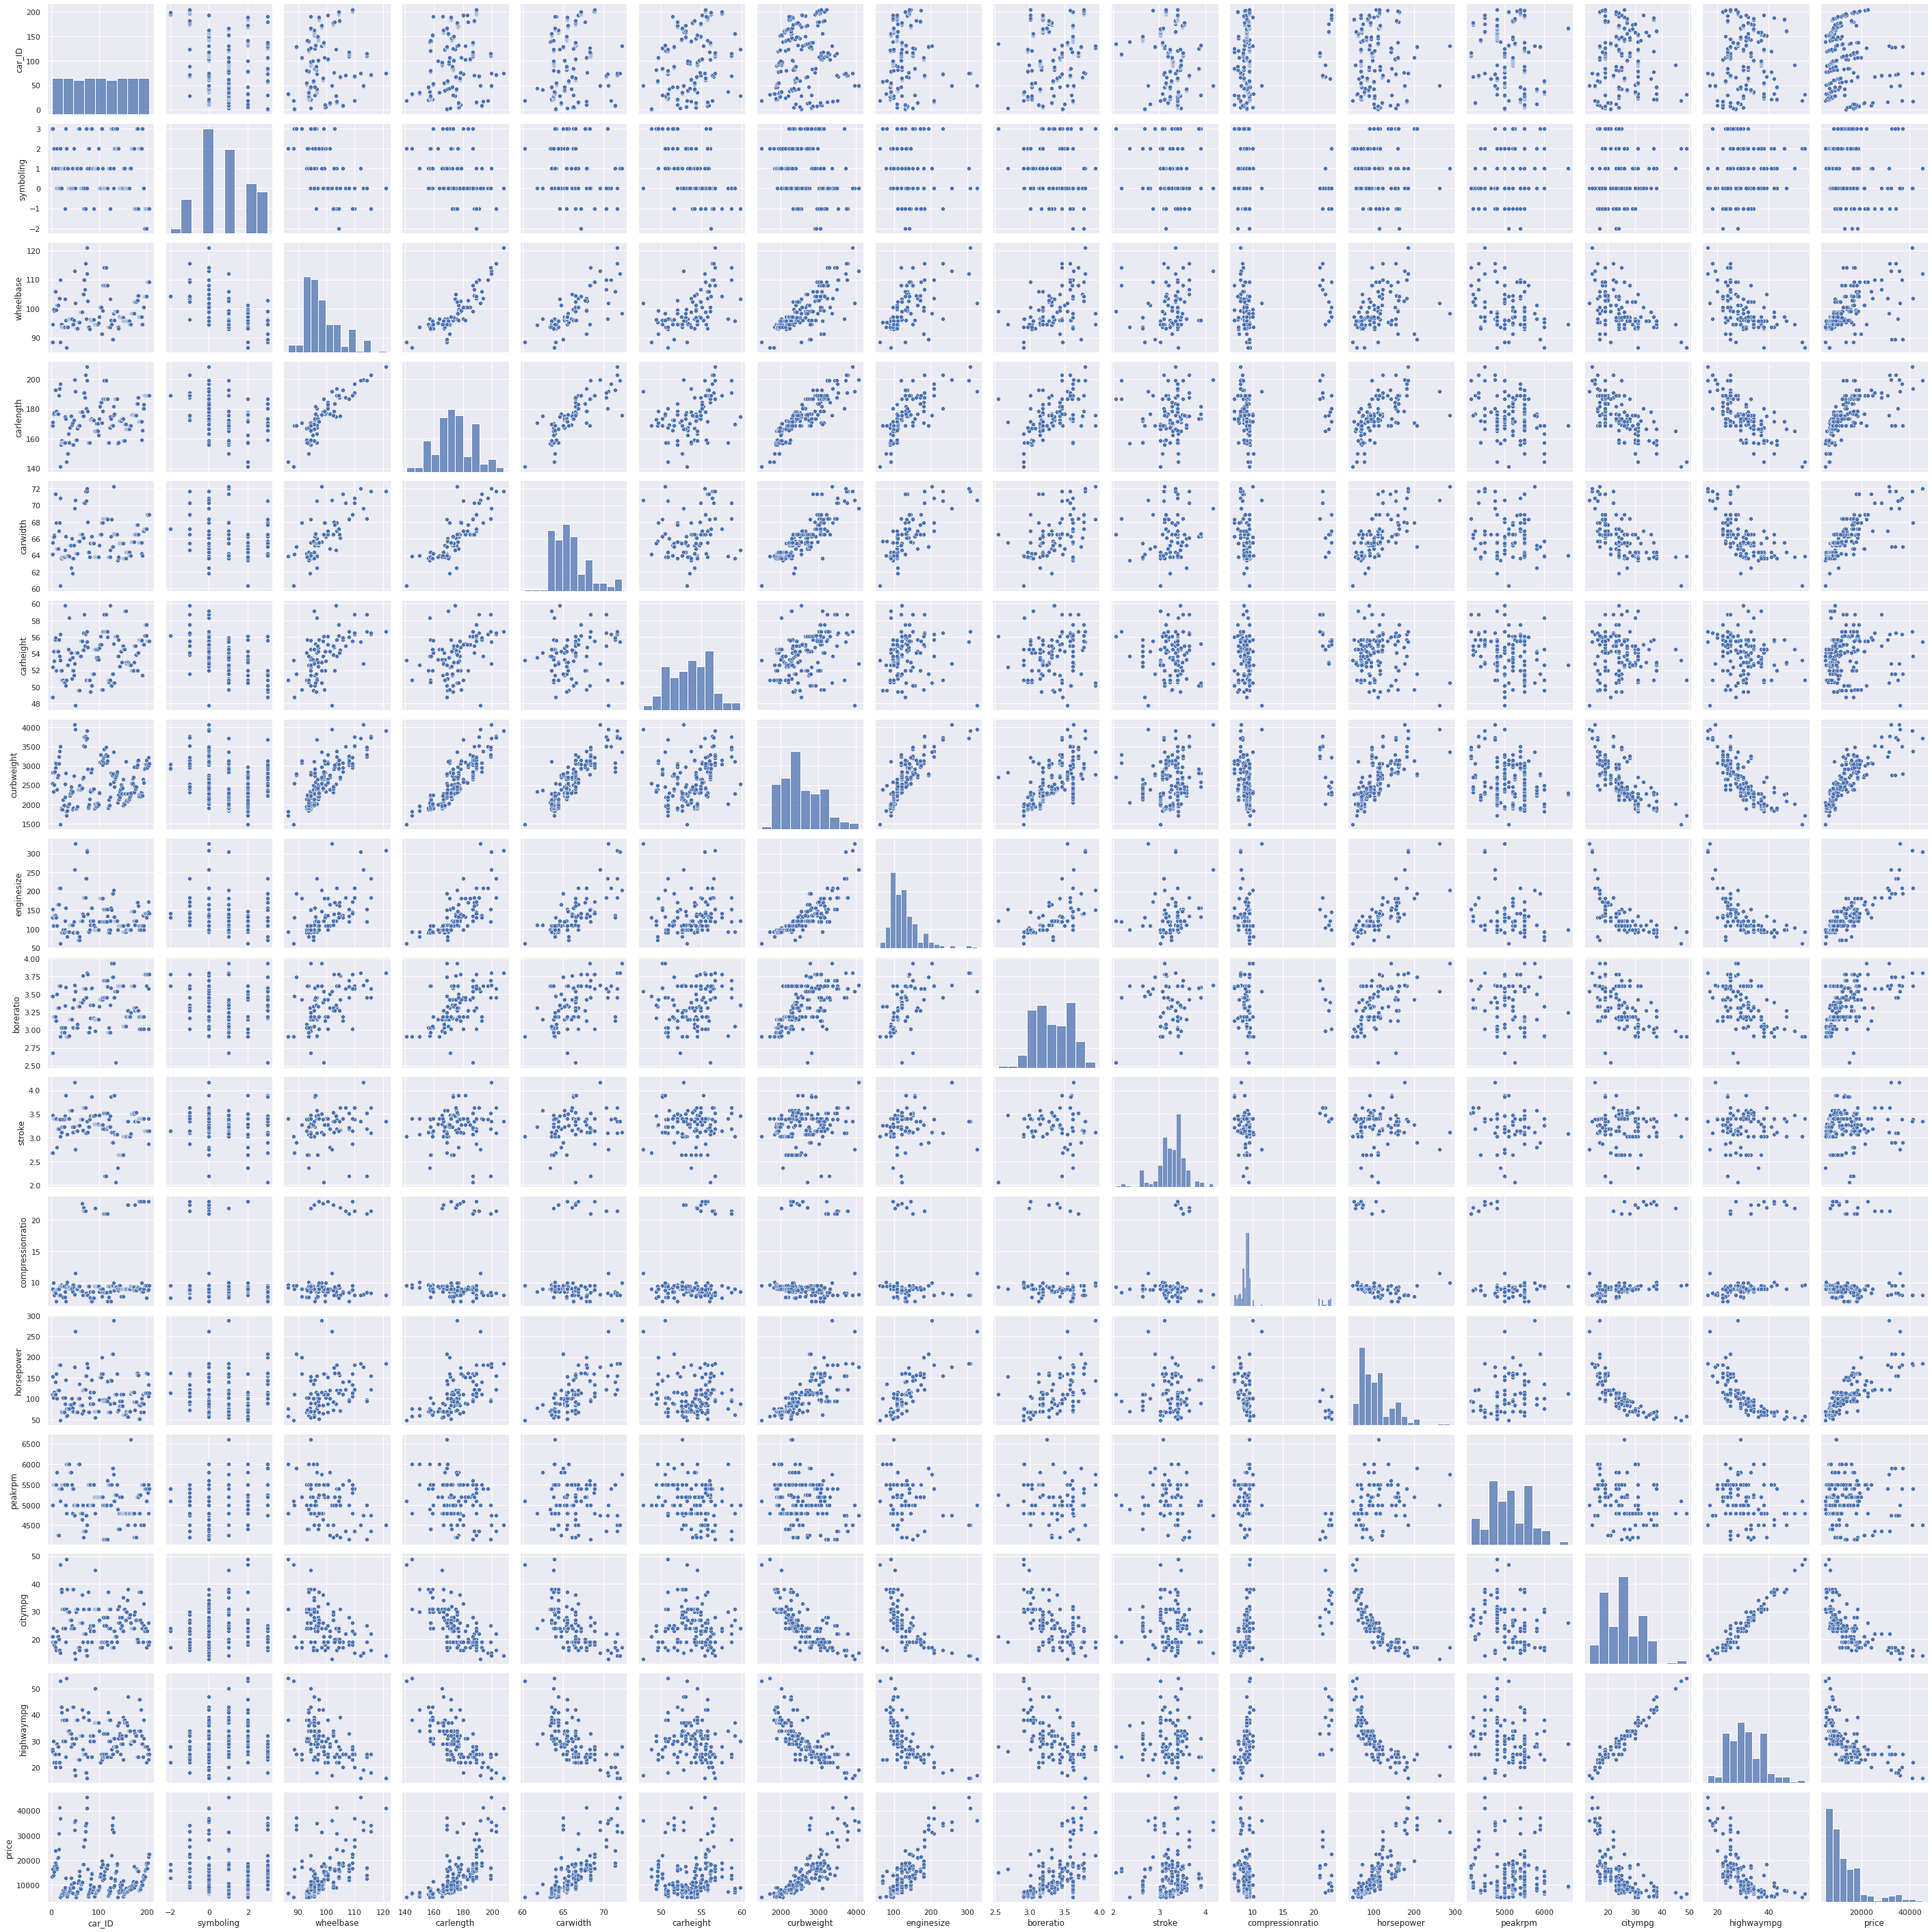

In [ ]:
#plot semua variabel
sns.pairplot(df)
plt.show()

## **Model Regresi Linier Sederhana**

Berdasarkan eksplorasi data yang sudah dilakukan, kita akan membuat model regresi linier sederhana dengan memodelkan variabel respons price dengan variabel prediktor enginesize.

### Estimasi Parameter

In [ ]:
#untuk membuat model regresi linier
X = df['enginesize']
Y = df['price']
X, Y = np.array(X).reshape(-1,1), np.array(Y)

reg = LinearRegression().fit(X, Y)

#regression coefficients
index_reg = ['b0', 'b1']
pd.DataFrame(data=np.append(reg.intercept_, reg.coef_), index=index_reg, columns=['value'])

,value
b0,-8005.445531
b1,167.698416


### Persamaan umum regresi :
$\hat{Y} = \hat{\beta}_{0} + \hat{\beta}_{1}X$
### Sehingga, persamaan regresi untuk price dan enginesize :
$\hat{Y} = -8005.445531+167.698416 X$

In [ ]:
#predicted value
Y_pred = reg.predict(X)
#print('predicted response:', Y_pred, sep='\n')

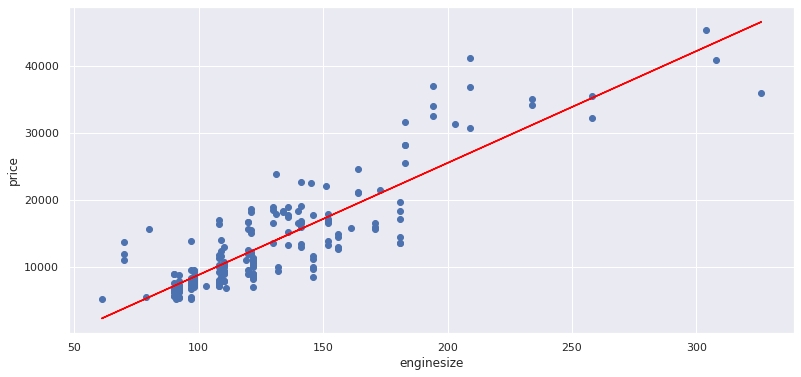

In [ ]:
#membuat plot price dengan enginesize
plt.scatter(X, Y)
plt.xlabel('enginesize')
plt.ylabel('price')

#membuat fitted regression line
plt.plot(X, Y_pred, color='red')
plt.show()

### Uji Signifikansi Parameter

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

In [ ]:
import statsmodels.api as sm
from scipy import stats

#summary
X2 = sm.add_constant(X)
result = sm.OLS(Y, X2).fit()

print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.35e-65
Time:                        04:33:43   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

jika t hitung > t tabel atau p-value < alpha -> tolak H0

jika t hitung < t tabel atau p-value > alpha -> gagal tolak H0


jika keputusannya adalah tolak H0, artinya x mempengaruhi y secara signifikan

jika keputusannya adalah gagal tolak H0, artinya x tidak mempengaruhi y secara signifikan

In [ ]:
#menghitung SSE, s^2 (MSE), se(b0), se(b1)
n = len(Y)
df = n-2

err = Y - Y_pred
err2 = np.square(err)
sse = sum(err2)
s2 = sse/df
s = np.sqrt(s2)

xbar = sum(X)/n
Sxx = sum(np.square(X-xbar))
se_b1 = s/np.sqrt(Sxx)
se_b0 = s*(np.sqrt((1/n)+(np.square(xbar)/Sxx)))

print('df', df)
print('SSE: ', round(sse,4))
print('s^2: ', round(s2,4))
print('se(b0): ', se_b0)
print('se(b1): ', se_b1)

df 203
SSE:  3070953588.138
s^2:  15127850.1879
se(b0):  [873.22074999]
se(b1):  [6.53935195]


In [ ]:
alpha = 0.05

#menghitung statistik uji t untuk b1
t = np.array(result.tvalues[1]) #ambil dari summary
print('t: ', t)

t_test = (reg.coef_-0)/se_b1 #cara lain hitung dengan rumus
print('t-test: ', t_test)

#menghitung t tabel
from scipy.stats import t
t_table = t.ppf(1-0.05/2, df)
print('t-table: ', t_table)

#menghitung P-value
pvalue = np.array(result.pvalues[1]) #ambil dari summary
print('p-value: ', pvalue)

#menghitung P-value
pval = 2*t.sf(t_test, df) #cara lain
print('p-value: ', pval)

#Daerah penolakan dan keputusan ???
if pvalue > alpha:
	print('gagal tolak H0 artinya tidak ada relasi linier antara Y (price) dan X(enginesize)')
else:
	print('tolak h0 ada relasi linier antara Y (price) dan X(enginesize)') #atau variabel X berpengaruh terhadap variabel Y

t:  25.644500804155385
t-test:  [25.6445008]
t-table:  1.9717188484613175
p-value:  1.354763759864529e-65
p-value:  [1.35476376e-65]
tolak h0 ada relasi linier antara Y (price) dan X(enginesize)


### Nilai Koefisien Determinasi (R-Square)

In [ ]:
# Predicting R2 Score
r2_score_linear = r2_score(Y, Y_pred).round(4)

#disajikan dalam tabel
index_eval = ['R2']
pd.DataFrame(data=[r2_score_linear], index=index_eval, columns=['value']).transpose()    

,R2
value,0.7641


INTERPRETASI:
Variabel prediktor (enginesize) mampu menjelaskan variansi variabel respon (price) sebesar 76.41%.
Sedangkan 23.59% dijelaskan oleh variabel lain yang tidak masuk dalam model persamaan regresi yang sudah kita buat.

# **Asumsi Regresi Linier**

**Saya mencoba mengerjakan tahap ini**

## **Hubungan Linier antara X dan Y**

Untuk mengetahui hubungan linier antara enginesize (X) dan price (Y) kita dapat menggunakan scatter plot. 

Untuk mengetahui ukuran relasi liniernya, kita dapat hitung nilai korelasi.

In [ ]:
from patsy import dmatrices
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

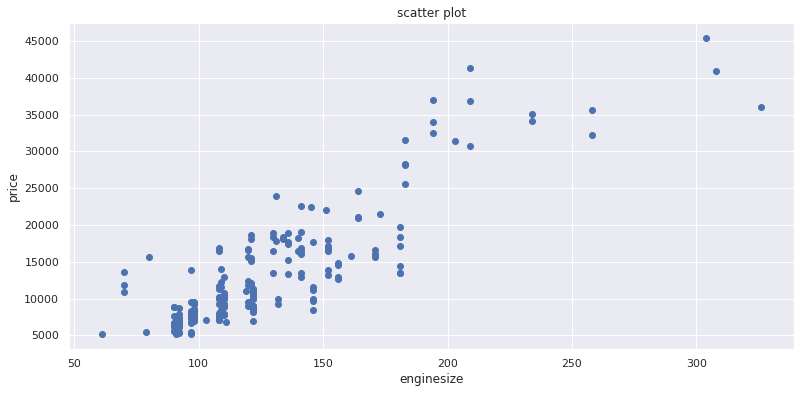

In [ ]:
#metode pertama membuat scatter plot
x = df['enginesize']
y = df['price']

plt.scatter(x,y)
plt.title('scatter plot')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


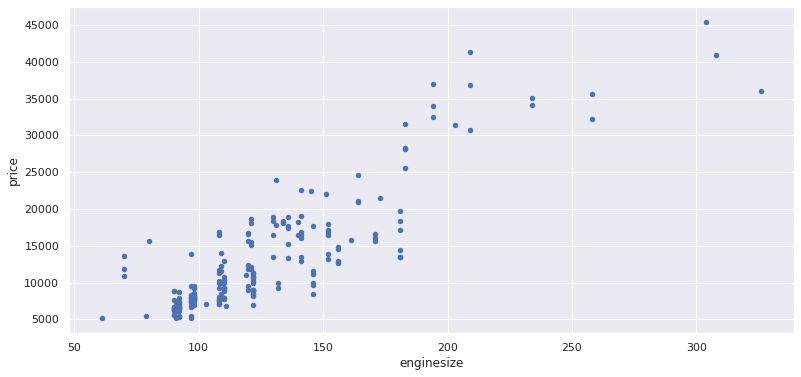

In [ ]:
#metode kedua membuat scatter plot untuk mengetahui hubungan X dan Y
df.plot.scatter(x='enginesize', y='price')
plt.xlabel('enginesize', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [ ]:
from scipy.stats import pearsonr

# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df['enginesize'], df['price'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: 0.8741


## **Independensi Error**

In [ ]:
# residuals model regresi linier sederhana
err = result.resid

print('residuals:', err, '\n')

residuals: [-3.00348600e+02  2.70465140e+03 -9.84713761e+02  3.67631814e+03
  2.64846090e+03  4.48460902e+02  2.90846090e+03  4.11846090e+03
  9.91195298e+03  3.89611998e+03  6.32401656e+03  6.81901656e+03
  1.47290524e+03  1.60790524e+03  5.06790524e+03  3.71647650e+03
  1.42714765e+04  9.83647650e+03  2.92684213e+03 -7.92411944e+02
 -5.12411944e+02 -1.51541194e+03 -7.10411944e+02 -4.71999275e+02
 -8.58411944e+02 -3.95411944e+02  5.21588056e+02  1.29000725e+02
 -3.53276127e+03 -5.19150743e+03 -9.43808777e+02 -5.67808777e+02
  1.56270636e+02 -8.93808777e+02 -2.93808777e+02 -1.27808777e+02
 -1.27808777e+02 -2.54638027e+03 -1.34638027e+03 -1.59638027e+03
 -1.46380272e+02  2.50361973e+03 -9.63802721e+01 -3.82407869e+03
  1.82908806e+03  1.82908806e+03 -9.02666020e+02 -3.01074590e+03
  2.89254102e+02 -1.06642382e+04 -2.06011036e+03 -1.16011036e+03
 -4.60110361e+02 -5.60110361e+02  1.39889639e+02  7.21155638e+03
  8.11155638e+03  9.91155638e+03  1.02345722e+04 -3.60876127e+03
 -3.95876127e+

time:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205]


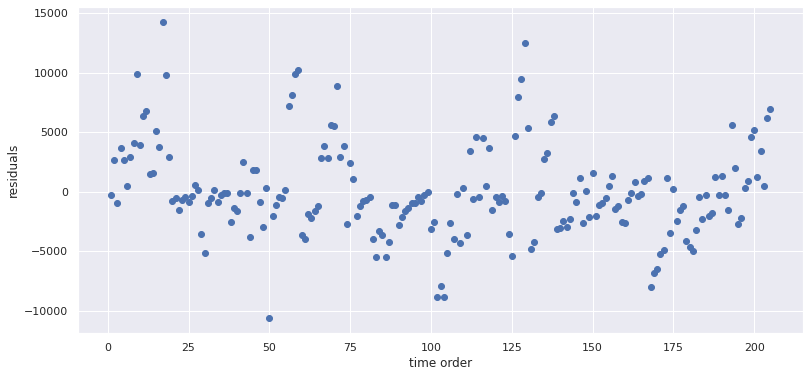

In [ ]:
## membuat plot residuals vs time order

# membuat list time order
time=list(range(1,205+1))
print("time: ", time)

plt.scatter(x=time, y=err)
plt.xlabel('time order', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(result.resid).round(3)

0.768

## **Variansi Error Konstan**

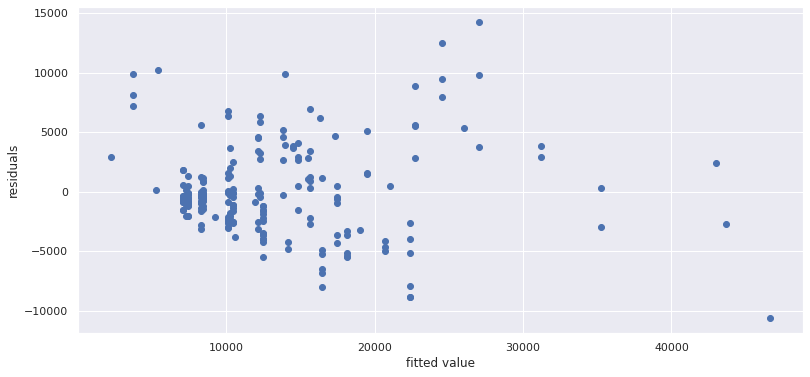

In [ ]:
# membuat plot residuals vs fitted value

plt.scatter(x=Y_pred, y=err)
plt.xlabel('fitted value', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

In [ ]:
# uji glejser
glejser = sm.OLS(abs(err), X2).fit()
print(glejser.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     47.72
Date:                Thu, 19 May 2022   Prob (F-statistic):           6.19e-11
Time:                        04:34:35   Log-Likelihood:                -1885.6
No. Observations:                 205   AIC:                             3775.
Df Residuals:                     203   BIC:                             3782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -725.4240    539.251     -1.345      0.1

In [ ]:
from numpy.lib.scimath import logn
from math import e

print(logn(e, 10)) #sama dengan ln(10)

print(np.log(10)) #sama dengan ln(10)

2.302585092994046
2.302585092994046


In [ ]:
# uji park
park1 =  sm.OLS(np.log(err2), X2).fit()
print(park1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     37.53
Date:                Thu, 19 May 2022   Prob (F-statistic):           4.59e-09
Time:                        04:34:40   Log-Likelihood:                -454.04
No. Observations:                 205   AIC:                             912.1
Df Residuals:                     203   BIC:                             918.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8834      0.500     23.764      0.0

## **Error Berdistribusi Normal**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


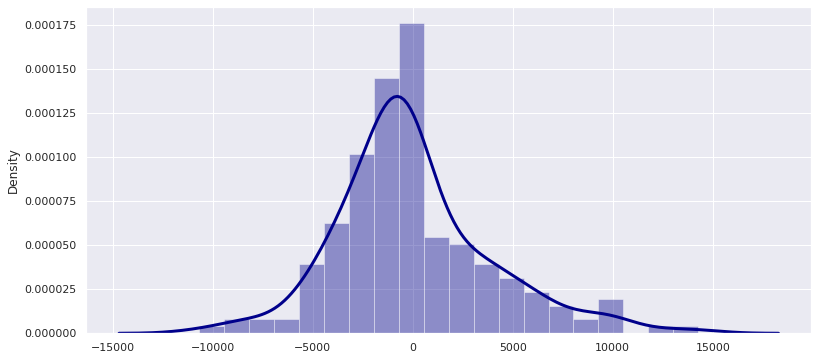

In [ ]:
# membuat histogram

sns.distplot(err, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 3})

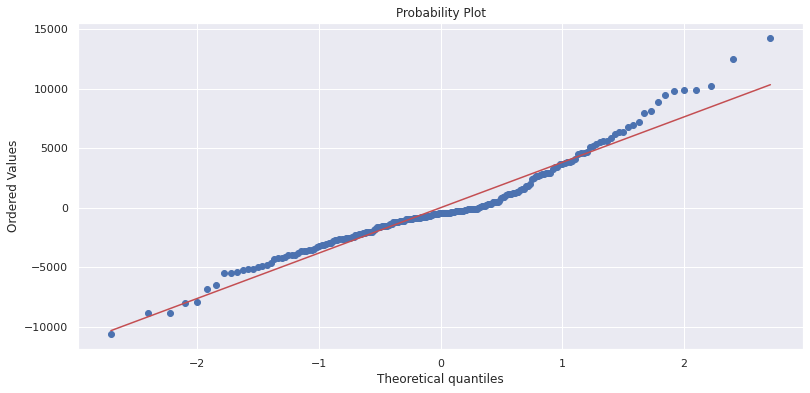

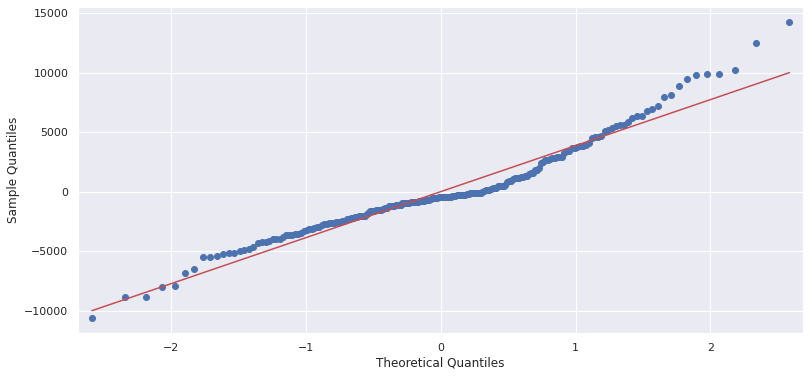

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import pylab 
import scipy.stats as stats

# membuat q-q plot
stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

# pakai sm
fig = sm.qqplot(err, line='s')
plt.show()

In [ ]:
from scipy.stats import kstest

# uji normalitas dengan kolmogorov-smirnov test
ks=kstest(err,'norm')
print('Statistic KS:', ks.statistic.round(4))
print('P-value:', ks.pvalue.round(4))

# interpret
alpha = 0.05
if ks.pvalue > alpha:
	print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
	print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistic KS: 0.6244
P-value: 0.0
Data Tidak Berdistribusi Normal (Tolak H0)
